In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import pyfolio as pf
import datetime
import os
import sys
from scipy.optimize import minimize, basinhopping
%matplotlib inline

In [2]:
sys.path.append('../src/factorinv/')

In [3]:
import analysis
import utils

# 读入数据

In [4]:
codes = utils.get_index_component('000905.SH')

In [5]:
pnl = utils.get_factor_panel(codes, columns='A,B,D,G,H,I,J')

In [6]:
pnl

<class 'pandas.core.panel.Panel'>
Dimensions: 500 (items) x 1530 (major_axis) x 6 (minor_axis)
Items axis: 000006.SZ to 603888.SH
Major_axis axis: 2011-04-01 00:00:00.005000 to 2017-07-17 00:00:00.005000
Minor_axis axis: caps to roic

In [7]:
pnl.ix[:, :, 'return'] = pnl.minor_xs('close').pct_change()

In [8]:
dic = {}

# 市值因子

In [9]:
df = pnl.minor_xs('caps')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='M', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [10]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: 45.66%
Sharpe ratio: 3.74
Annual volatility: 10.22%
Max drawdown: -10.72%


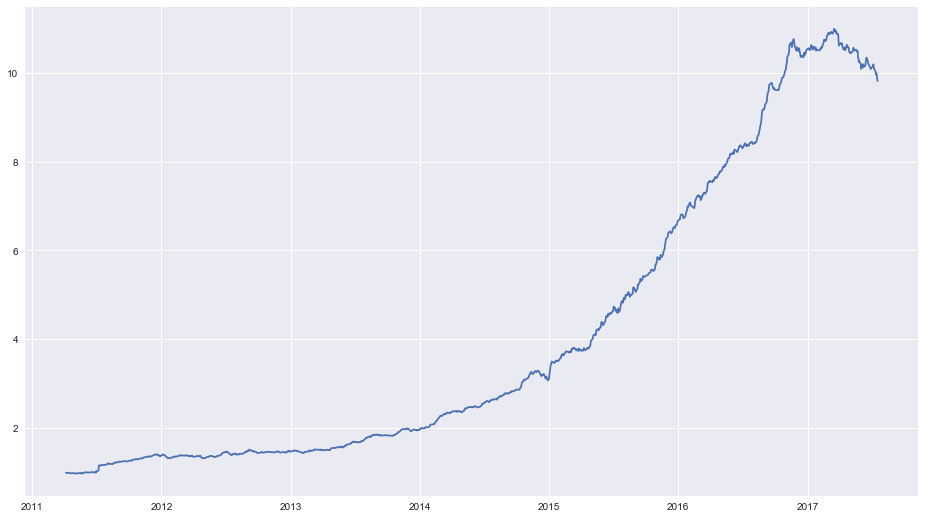

In [11]:
dic['caps'] = daily_return
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic['caps']))

# carry因子

In [12]:
df = pnl.minor_xs('roic')
weight_df_long = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=True, frequency='M', threshold=0.2)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [13]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: -0.11%
Sharpe ratio: 0.07
Annual volatility: 15.09%
Max drawdown: -58.43%


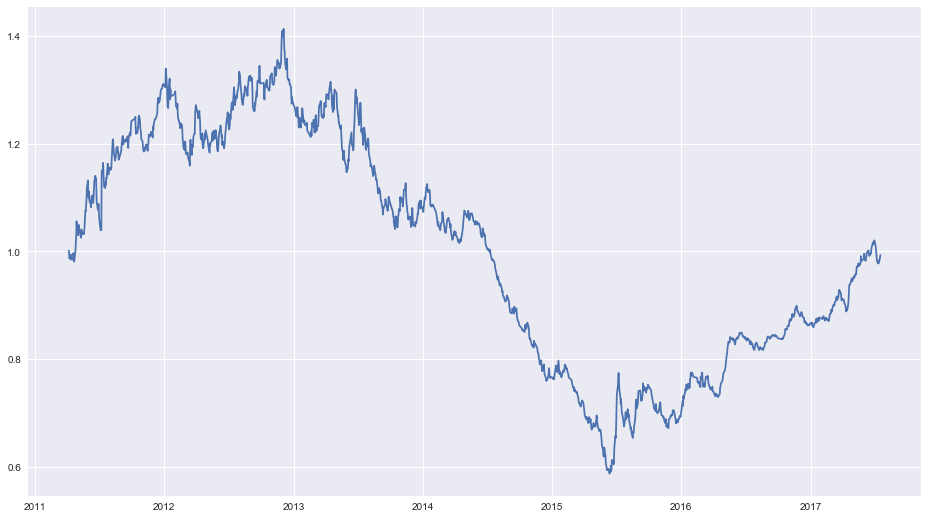

In [14]:
dic['carry'] = daily_return
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(daily_return))

# 价值因子

In [15]:
df = pnl.minor_xs('pe')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='M', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [16]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: -7.18%
Sharpe ratio: -0.63
Annual volatility: 10.85%
Max drawdown: -47.50%


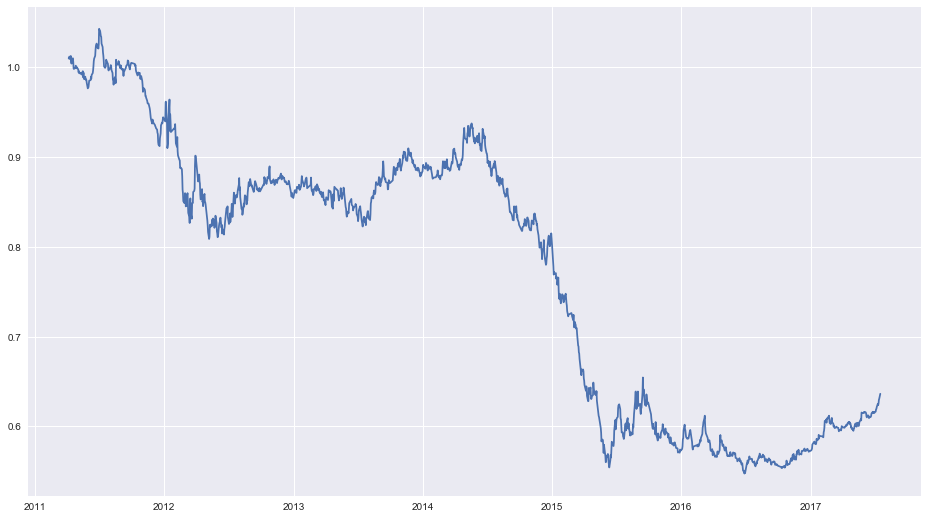

In [17]:
dic['value'] = daily_return
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic['value']))

# 动量因子

In [18]:
pnl.ix[:, :, 'momentum'] = pnl.minor_xs('return').rolling(window=242).mean()

In [19]:
df = pnl.minor_xs('momentum')
weight_df_long = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=True, frequency='M', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [20]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: -2.25%
Sharpe ratio: -0.15
Annual volatility: 12.90%
Max drawdown: -43.33%


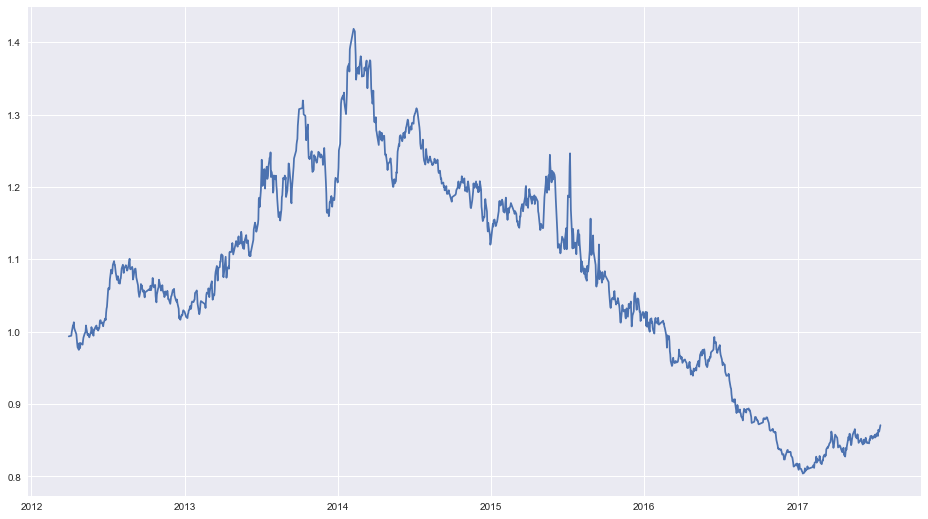

In [21]:
dic['momentum'] = daily_return
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic['momentum']))

# 波动率因子

In [22]:
pnl.ix[:, :, 'volatility'] = pnl.minor_xs('return').rolling(window=242).std()

In [23]:
df = pnl.minor_xs('volatility')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='M', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [24]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: -6.91%
Sharpe ratio: -0.54
Annual volatility: 13.96%
Max drawdown: -44.08%


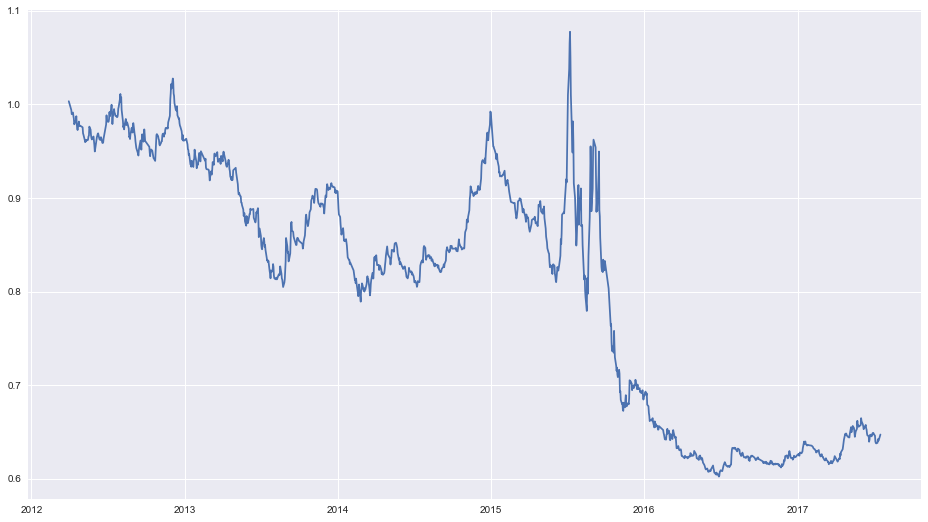

In [25]:
dic['volatility'] = daily_return
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic['volatility']))

# 持仓盈利因子

In [26]:
df = pnl.minor_xs('profit percentage')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='M', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='M', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')

In [27]:
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long - pnl.minor_xs('return').mean(axis=1)
daily_return = daily_return[daily_return != 0]
utils.get_metrics(daily_return)

Annual return: -3.49%
Sharpe ratio: -0.43
Annual volatility: 8.50%
Max drawdown: -25.74%


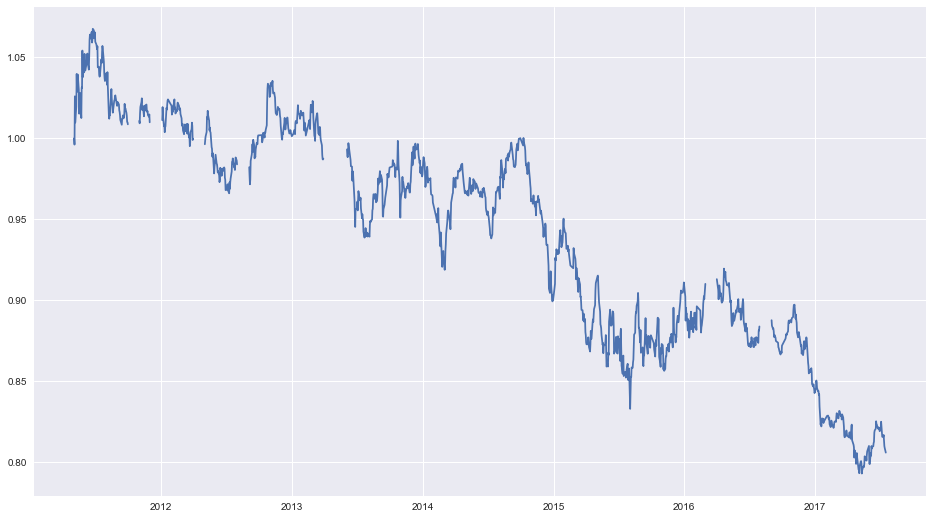

In [28]:
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(daily_return))

In [29]:
df = pd.DataFrame(dic)

In [30]:
df.dropna().corr()

,caps,carry,momentum,value,volatility
caps,1.000000,0.095625,0.051169,-0.017476,-0.091823
carry,0.095625,1.000000,0.173155,0.437401,0.579864
momentum,0.051169,0.173155,1.000000,-0.017340,0.080337
value,-0.017476,0.437401,-0.017340,1.000000,0.501672
volatility,-0.091823,0.579864,0.080337,0.501672,1.000000


In [33]:
df.dropna().corr().to_excel('C:/Users/jgtzsx01/Desktop/corr.xlsx')

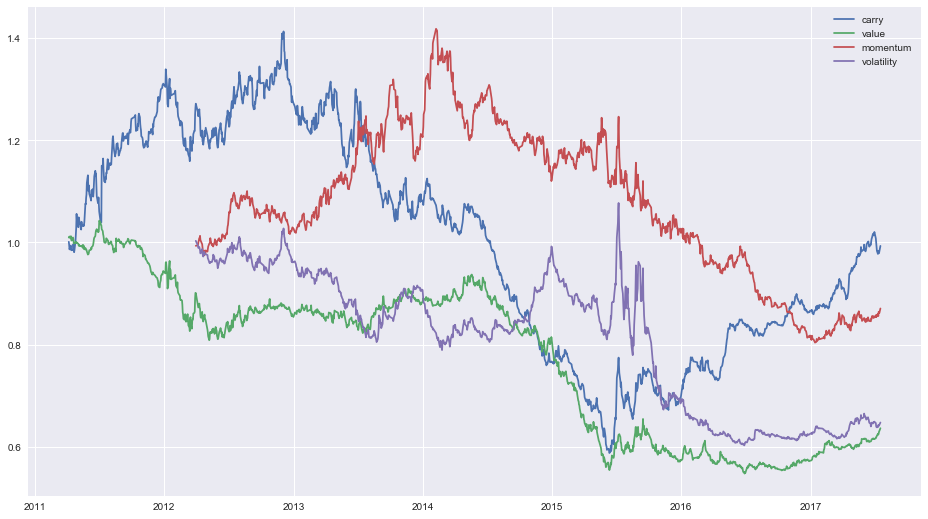

In [31]:
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic['carry']), label='carry')
plt.plot(utils.get_accumulated_return(dic['value']), label='value')
plt.plot(utils.get_accumulated_return(dic['momentum']), label='momentum')
plt.plot(utils.get_accumulated_return(dic['volatility']), label='volatility')
# plt.plot(utils.get_accumulated_return(dic['caps']), label='caps')
plt.legend()

# 因子risk parity

In [149]:
dic_ret = {}

In [150]:
df = pnl.minor_xs('caps')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long
dic_ret['caps'] = daily_return

In [151]:
df = pnl.minor_xs('pe')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long
dic_ret['value'] = daily_return

In [152]:
df = pnl.minor_xs('momentum')
weight_df_long = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long
dic_ret['momentum'] = daily_return

In [153]:
df = pnl.minor_xs('volatility')
weight_df_long = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long
dic_ret['volatility'] = daily_return

In [154]:
df = pnl.minor_xs('roic')
weight_df_long = analysis.factor_weight(df, ascending=False, frequency='D', threshold=0.1)
weight_df_long = weight_df_long.div(weight_df_long.sum(axis=1), axis='index')
# weight_df_short = analysis.factor_weight(df, ascending=True, frequency='D', threshold=0.1)
# weight_df_short = weight_df_short.div(weight_df_short.sum(axis=1), axis='index')
daily_return_long = (weight_df_long.shift(1) * pnl.minor_xs('return')).sum(axis=1)
# daily_return_short = (weight_df_short.shift(1) * pnl.minor_xs('return')).sum(axis=1)
daily_return = daily_return_long
dic_ret['carry'] = daily_return

In [155]:
df = pd.DataFrame(dic_ret)

In [156]:
df.corr()

,caps,carry,momentum,value,volatility
caps,1.000000,0.882027,0.867777,0.870077,0.834048
carry,0.882027,1.000000,0.826743,0.808314,0.799447
momentum,0.867777,0.826743,1.000000,0.821347,0.789613
value,0.870077,0.808314,0.821347,1.000000,0.861445
volatility,0.834048,0.799447,0.789613,0.861445,1.000000


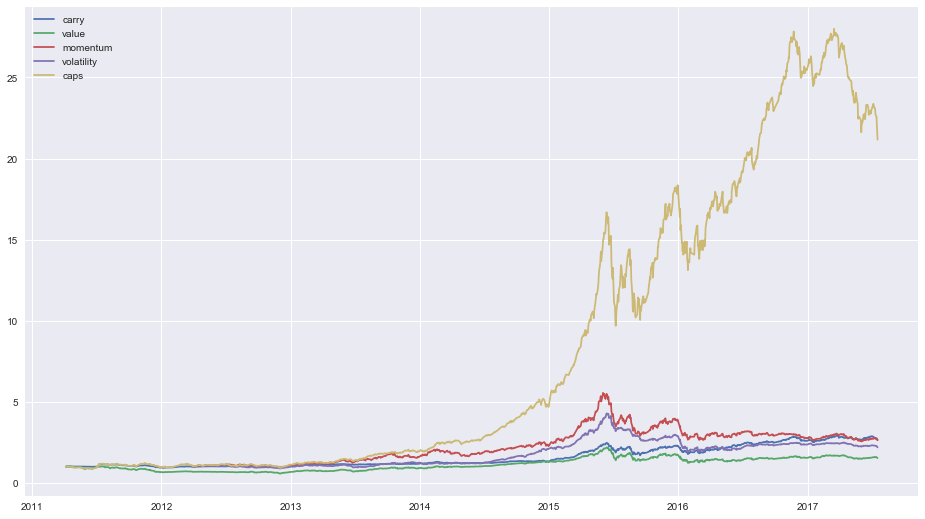

In [157]:
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(dic_ret['carry']), label='carry')
plt.plot(utils.get_accumulated_return(dic_ret['value']), label='value')
plt.plot(utils.get_accumulated_return(dic_ret['momentum']), label='momentum')
plt.plot(utils.get_accumulated_return(dic_ret['volatility']), label='volatility')
plt.plot(utils.get_accumulated_return(dic_ret['caps']), label='caps')
plt.legend()

In [158]:
 # 风险预算优化
def calculate_portfolio_var(w, V):
    # 计算组合风险的函数
    return w.dot(V).dot(w)
def calculate_risk_contribution(w ,V):
    # 边际风险贡献
    MRC = V.dot(w)
    # 风险贡献
    RC = w * MRC
    return RC
def risk_budget_objective(x, pars):
    # 计算组合风险
    V = pars[0]# 协方差矩阵
    MRC = V.dot(x)
    ARC = x * MRC
    J = np.sum([(i-j)**2 for i in ARC for j in ARC])
#     J = x.dot(MRC) - np.log(x).sum()
#     J = calculate_portfolio_var(x, V) - np.log(x).sum()
#     J = sum(np.square(asset_RC - risk_target.T))[0, 0] # sum of squared error
#     J = np.abs(asset_RC.max() - asset_RC.min())
    return J
def total_weight_constraint(x):
    return np.sum(x) - 1.0
def long_only_constraint(x):
    return x

In [159]:
# 根据资产预期目标风险贡献度来计算各资产的权重
def calcu_w(V):
    N = V.shape[0]
    w0 = np.random.random_sample((N,))
    w0 /= w0.sum()
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
            {'type': 'ineq', 'fun': long_only_constraint})
    minimizer_args = {'method': 'SLSQP', 'args': [V], 'constraints': cons}
#     minimizer_args = {'method': 'L-BFGS-B', 'args': [V], 'bounds': np.array([(0., None)]*N)}
#     weight = res.x / res.x.sum()
    res = basinhopping(risk_budget_objective, w0, stepsize=1e-6, minimizer_kwargs=minimizer_args)
#     res = minimize(risk_budget_objective, w0, args=[V], method='SLSQP',constraints=cons)
    return res.x

In [160]:
ret_df = df.dropna()

In [84]:
months = pd.Series(ret_df.index.map(lambda x: (x.year, x.month)), index=ret_df.index)
rebalance_dates = months.drop_duplicates(keep='last').index

In [85]:
weight = pd.DataFrame(columns=ret_df.columns, index=ret_df.index)
wb = np.zeros(ret_df.shape[1])
for date in ret_df.index:
    weight.loc[date] = wb
    if date in rebalance_dates:
        past_return = ret_df[ret_df.index <= date][-242:]
        if past_return.shape[0] < 242:
            continue
        cov = past_return.cov()
        wb = calcu_w(cov*10000)

In [86]:
weight.drop_duplicates()

,caps,carry,momentum,value,volatility
2011-04-01 00:00:00.005,0,0,0,0,0
2012-04-05 00:00:00.005,0.00175345,0.00188282,0.965729,0.00133458,0.0293002
2012-05-02 00:00:00.005,0.0671419,0.121577,0.481346,0.109231,0.220705
2012-06-01 00:00:00.005,0.0780957,0.138373,0.416945,0.129278,0.237308
2012-07-02 00:00:00.005,0.0856982,0.153491,0.368105,0.144541,0.248165
2012-08-01 00:00:00.005,0.0919175,0.163501,0.316943,0.160057,0.267581
2012-09-03 00:00:00.005,0.107756,0.175943,0.299922,0.217569,0.198809
2012-10-08 00:00:00.005,0.114681,0.186747,0.261807,0.241104,0.195662
2012-11-01 00:00:00.005,0.0736986,0.240956,0.261004,0.322249,0.102093
2012-12-03 00:00:00.005,0.0726113,0.249402,0.226412,0.350665,0.10091


In [93]:
portfolio_ret = (weight * ret_df).sum(axis=1)

In [94]:
portfolio_ret = portfolio_ret[portfolio_ret != 0]

In [95]:
utils.get_metrics(portfolio_ret)

Annual return: 37.26%
Sharpe ratio: 1.77
Annual volatility: 18.96%
Max drawdown: -29.14%


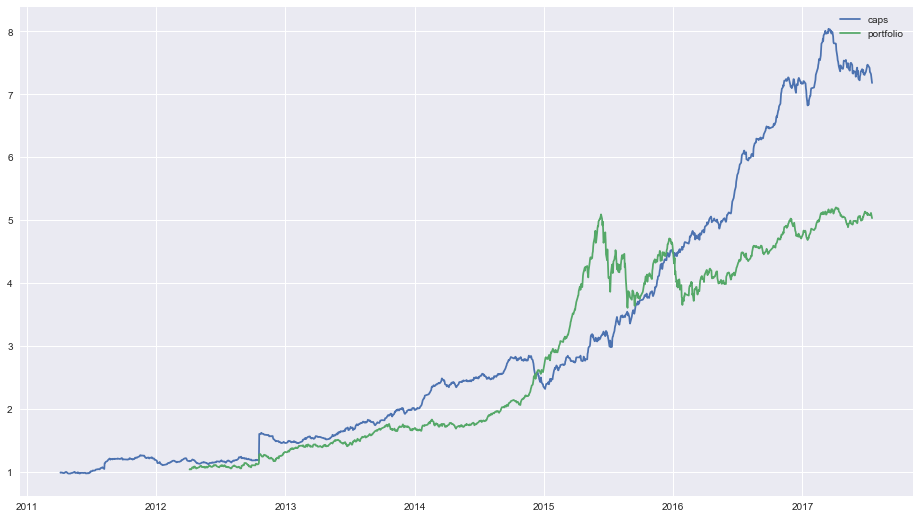

In [105]:
plt.figure(figsize=(16, 9))
# plt.plot(utils.get_accumulated_return(dic['carry']), label='carry')
# plt.plot(utils.get_accumulated_return(dic['value']), label='value')
# plt.plot(utils.get_accumulated_return(dic['momentum']), label='momentum')
# plt.plot(utils.get_accumulated_return(dic['volatility']), label='volatility')
# plt.plot(utils.get_accumulated_return(dic['caps']), label='caps')
plt.plot(utils.get_accumulated_return(portfolio_ret), label='portfolio')
plt.legend()

In [97]:
weight = pd.DataFrame(columns=ret_df.columns, index=ret_df.index)
wb = np.zeros(ret_df.shape[1])
for date in ret_df.index:
    weight.loc[date] = wb
    if date in rebalance_dates:
        past_return = ret_df[ret_df.index <= date][-242:]
        if past_return.shape[0] < 242:
            continue
        risk_free = 0
        wb = 1. / -past_return[past_return < risk_free].sum()
        wb /= wb.sum()

In [98]:
weight.drop_duplicates()

,caps,carry,momentum,value,volatility
2011-04-01 00:00:00.005,0,0,0,0,0
2012-04-05 00:00:00.005,0.00241417,0.00414088,0.980004,0.00373542,0.00970516
2012-05-02 00:00:00.005,0.0291403,0.050288,0.76677,0.0457213,0.10808
2012-06-01 00:00:00.005,0.0513444,0.0847758,0.624692,0.0835298,0.155658
2012-07-02 00:00:00.005,0.073452,0.122101,0.480436,0.125344,0.198667
2012-08-01 00:00:00.005,0.0885845,0.147984,0.374202,0.163029,0.2262
2012-09-03 00:00:00.005,0.101211,0.162005,0.302354,0.200077,0.234353
2012-10-08 00:00:00.005,0.11044,0.184995,0.255687,0.230999,0.217879
2012-11-01 00:00:00.005,0.113026,0.195677,0.22899,0.240785,0.221522
2012-12-03 00:00:00.005,0.111515,0.198123,0.189522,0.268045,0.232795


In [99]:
portfolio_ret_omega = (weight * ret_df).sum(axis=1)

In [100]:
portfolio_ret_omega = portfolio_ret_omega[portfolio_ret_omega != 0]

In [101]:
utils.get_metrics(portfolio_ret_omega)

Annual return: 38.64%
Sharpe ratio: 1.81
Annual volatility: 19.07%
Max drawdown: -28.40%


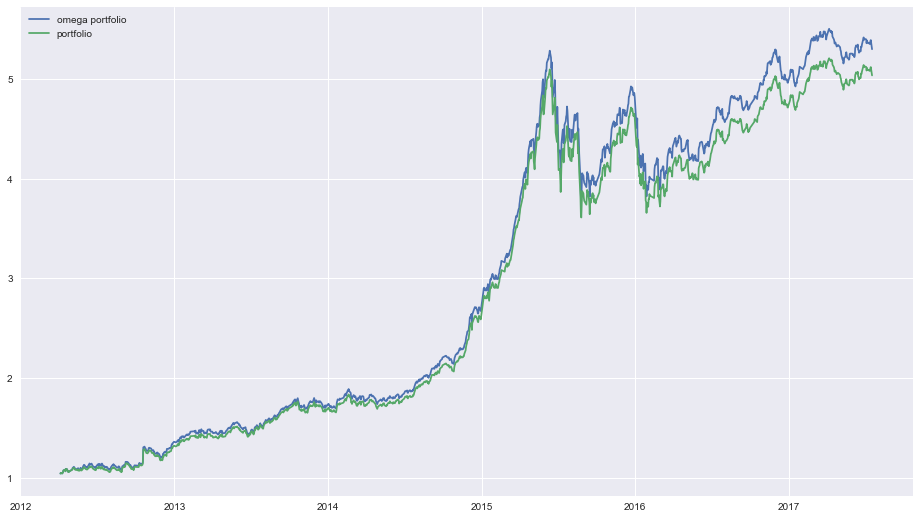

In [104]:
plt.figure(figsize=(16, 9))
plt.plot(utils.get_accumulated_return(portfolio_ret_omega), label='omega portfolio')
plt.plot(utils.get_accumulated_return(portfolio_ret), label='portfolio')
plt.legend()

# 综合以上因子

In [55]:
weight_df = analysis.factor_weight(pnl.minor_xs('pe'), ascending=True, threshold=0.05, frequency='M')

In [57]:
temp_df = analysis.factor_weight(pnl.minor_xs('roic'), ascending=False, threshold=0.05, frequency='M')
weight_df += temp_df

In [58]:
temp_df = analysis.factor_weight(pnl.minor_xs('momentum'), ascending=False, threshold=0.05, frequency='M')
weight_df += temp_df

In [59]:
temp_df = analysis.factor_weight(pnl.minor_xs('volatility'), ascending=True, threshold=0.05, frequency='M')
weight_df += temp_df

In [60]:
temp_df = analysis.factor_weight(pnl.minor_xs('profit percentage'), ascending=True, threshold=0.05, frequency='M')
weight_df += temp_df

In [61]:
weight_df.sum(axis=1).tail()

2017-07-11 00:00:00.005    64.0
2017-07-12 00:00:00.005    64.0
2017-07-13 00:00:00.005    64.0
2017-07-14 00:00:00.005    64.0
2017-07-17 00:00:00.005    72.0
dtype: float64

In [62]:
weight_df = weight_df.div(weight_df.sum(axis=1), axis='index')

In [63]:
daily_return = analysis.calculate_return(weight_df, pnl.minor_xs('return'))

In [64]:
daily_return = daily_return[daily_return != 0]

In [65]:
utils.get_metrics(daily_return)

Annual return: 24.90%
Sharpe ratio: 1.02
Annual volatility: 24.92%
Max drawdown: -46.58%


In [66]:
acc_ret = utils.get_accumulated_return(daily_return)

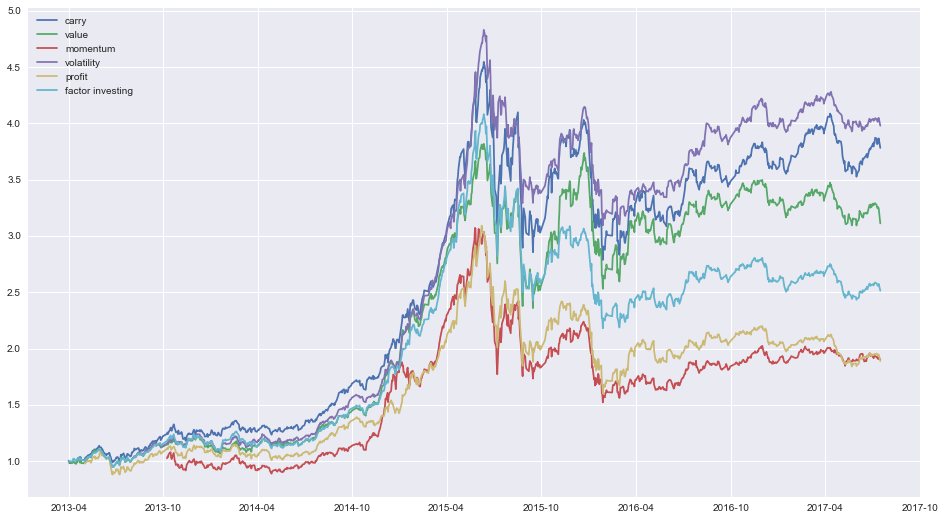

In [67]:
plt.figure(figsize=(16, 9))
plt.plot((1+dic['carry']).cumprod(), label='carry')
plt.plot((1+dic['value']).cumprod(), label='value')
plt.plot((1+dic['momentum']).cumprod(), label='momentum')
plt.plot((1+dic['volatility']).cumprod(), label='volatility')
plt.plot((1+dic['profit']).cumprod(), label='profit')
plt.plot(acc_ret, label='factor investing')
plt.legend()

# 过去代码

In [25]:
ret_df = pnl.minor_xs('ret')

In [26]:
ret_df.tail()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2017-05-31 00:00:00.005,0.010989,0.034550,0.0,0.003861,-0.008274,0.0,-0.008392,0.004098,0.014257,0.003361,...,-0.006678,-0.011971,0.006194,0.064865,0.011432,-0.004728,-0.016166,-0.018455,0.000000,-0.005079
2017-06-01 00:00:00.005,-0.001087,-0.007996,0.0,-0.023077,-0.021454,0.0,-0.012694,-0.012245,-0.054217,-0.008375,...,-0.072269,-0.031987,-0.012580,-0.072081,-0.076964,-0.033254,0.016432,0.000000,-0.021821,-0.045431
2017-06-02 00:00:00.005,-0.002176,-0.006638,0.0,0.005906,0.031669,0.0,0.015714,0.009642,0.050955,0.075450,...,0.042120,-0.004172,-0.014367,0.021335,0.029446,-0.007371,-0.005774,0.000000,0.021538,0.016043
2017-06-05 00:00:00.005,-0.015267,0.007160,0.0,0.000000,0.001181,0.0,0.001406,0.008186,-0.014141,-0.003665,...,0.015645,0.005195,0.000825,0.004821,0.067686,0.007426,-0.006969,0.000000,0.038404,0.018421
2017-06-06 00:00:00.005,0.001107,-0.010900,0.0,0.005871,0.005896,0.0,0.002809,0.005413,0.008197,0.018917,...,0.013693,-0.004668,0.000000,0.000267,0.026790,0.004914,0.005848,0.000000,0.000000,0.001550


In [161]:
def factor_return(ret_df, df, ascending=True, percent=0.1):
    '''
    计算因子收益率
    ret_df: 收益率矩阵
    df: 因子矩阵
    ascending: 因子从小到大
    percent: 取前百分比
    '''
    assert(ret_df.shape == df.shape)
    # 因子排序
    rdf = df.rank(axis=1, ascending=ascending, pct=True, method='first')
    rdf = rdf[rdf <= percent]
    factor_df = pd.Series(index=ret_df.index)
    for index in rdf.index:
        rank, ret = rdf.loc[index], ret_df.loc[index]
        # 取包含该因子的股票
        stocks = rank[~rank.isnull()].index
        # 计算股票集的平均收益率
#         print stocks
        factor_ret = ret[stocks].mean()
        factor_df.loc[index] = factor_ret
    return factor_df

# 市值因子（小市值）

In [111]:
df = pnl.minor_xs('caps')

In [112]:
factor_df = factor_return(ret_df, df)

In [113]:
cum_ret = (1 + factor_df).cumprod()

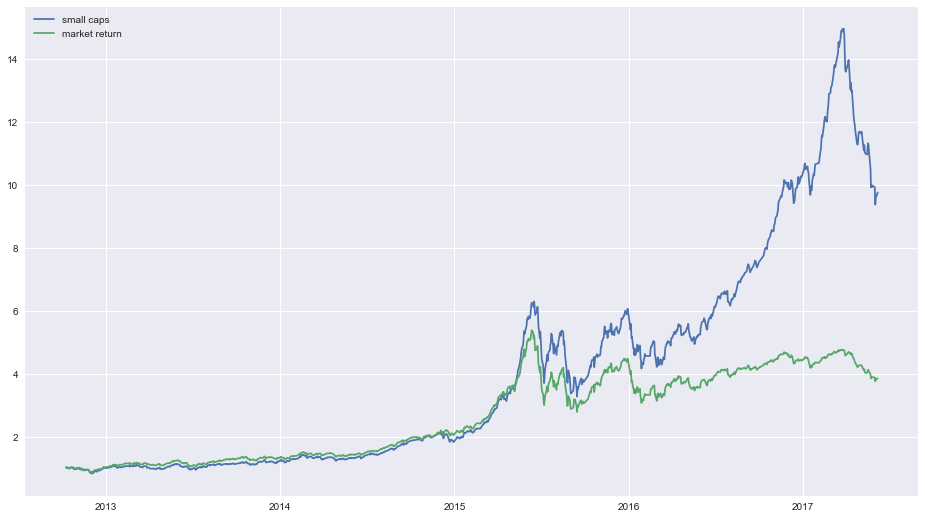

In [114]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label='small caps')
plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()

# 市值因子（大市值）

In [115]:
df = pnl.minor_xs('caps')

In [116]:
factor_df = factor_return(ret_df, df, ascending=False, percent=0.01)

In [117]:
cum_ret = (1 + factor_df).cumprod()

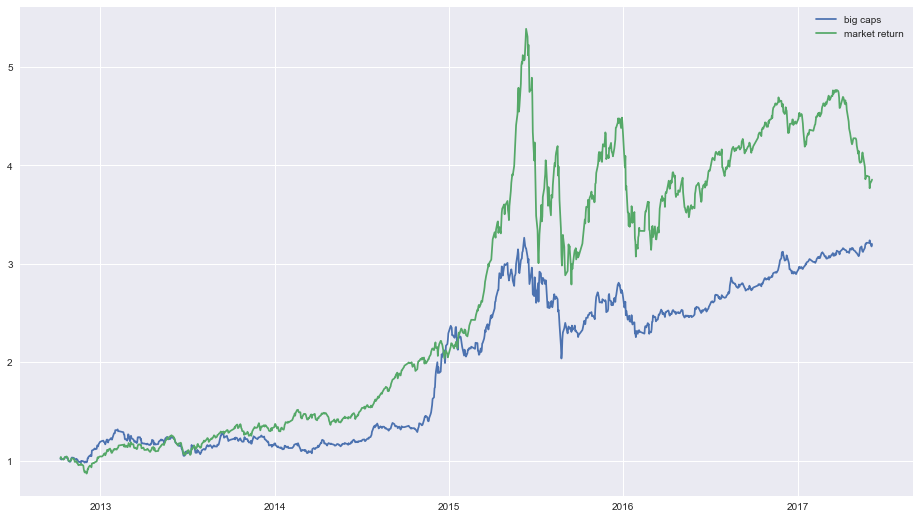

In [119]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label=u'big caps')
plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()

# 波动率因子（一个月低波动率）

In [175]:
df = pnl.minor_xs('volatility 1M')

In [176]:
factor_df = factor_return(ret_df, df, percent=0.1)

In [177]:
cum_ret = (1 + factor_df).cumprod()

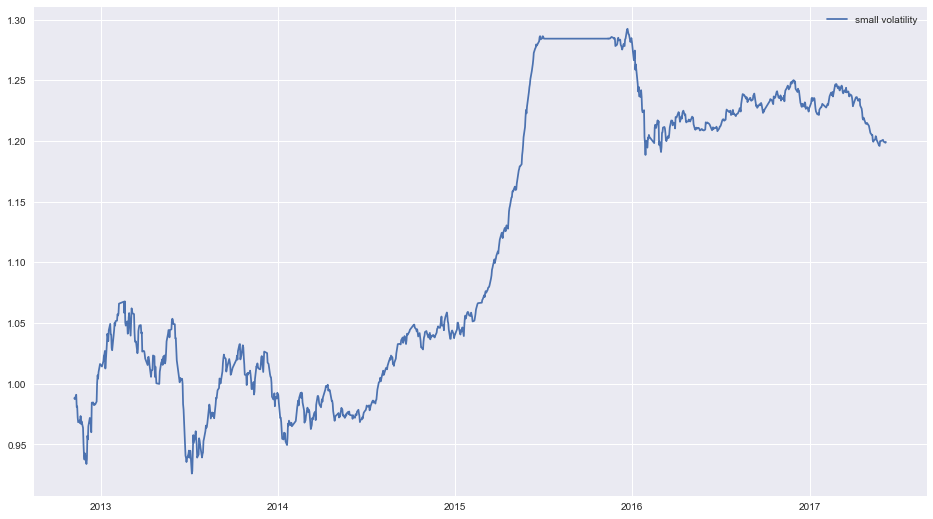

In [178]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label=u'small volatility')
# plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()